# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [47]:
import pandas as pd
import seaborn as sns


In [ ]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr, beta
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import ttest_ind, norm, t
from scipy.stats import f_oneway

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:
salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [5]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [8]:
salaries.isna().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [25]:
salaries.groupby("Salary or Hourly").aggregate({"Salary or Hourly":["count"]})

,Salary or Hourly
,count
Salary or Hourly,
Hourly,8022
Salary,25161


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [24]:
salaries.groupby("Department").aggregate({"Name":["count"]})

,Name
,count
Department,
ADMIN HEARNG,39
ANIMAL CONTRL,81
AVIATION,1629
BOARD OF ELECTION,107
BOARD OF ETHICS,8
BUDGET & MGMT,46
BUILDINGS,269
BUSINESS AFFAIRS,171


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [42]:
# "Salary or Hourly" = "Hourly" have "Hourly Rate" != 30$/hr. Same sample being compared to a value -> ztest
# H0: the hourly rate is 30
# H1: the hourly rate is different from 30
from statsmodels.stats.weightstats import ztest as ztest
sample_HourlyRate = salaries["Hourly Rate"][salaries["Salary or Hourly"]=="Hourly"]
_, p_value = ztest(sample_HourlyRate, value = 30)
p_value # Very small probability to be 30
# The hourly salary of hourly employeed workers is different from 30

1.8228873859286195e-94

In [46]:
salaries.aggregate({"Hourly Rate":["mean", "std"]})
# This results seem to not support the previous conclusion. So we check the histogram:

,Hourly Rate
mean,32.788558
std,12.112573


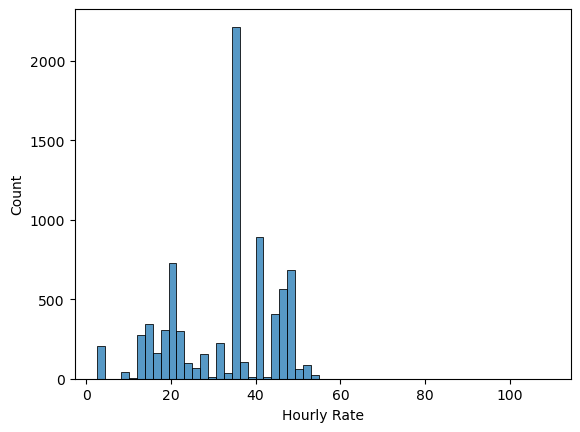

In [49]:
sns.histplot(x=salaries["Hourly Rate"][salaries["Salary or Hourly"]=="Hourly"]);
# It's unlikely that people in this sample earn 30 $/hr

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [51]:
salaries.sample()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
20821,"MUZUPAPPA, JAMES J",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN


In [75]:
# "Department" = "POLICE" have "Salary" > 86000$/year. Same sample being compared to a value -> ztest
# H0: the Police department earns 86000
# H1: the Police department earns more than 86000
sample_Salary = salaries["Annual Salary"][(salaries["Department"]=="POLICE") & (salaries["Salary or Hourly"]=="Salary")]
_, p_value = ztest(sample_Salary, value = 86000, alternative = "larger")
p_value # small probability that the employees in the Police earn 86000, being the alternative earning more

0.0010280845287547855

Using the `crosstab` function, find the department that has the most hourly workers. 

In [74]:
# Your code here:
pd.crosstab(salaries.Department, salaries["Salary or Hourly"][salaries ["Salary or Hourly"]== "Hourly"]).sort_values(by=["Hourly"], ascending=False).head(1)

Salary or Hourly,Hourly
Department,
STREETS & SAN,1862


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [88]:
# Using t-test as asked.
# "STREETS & SAN" say their hourly rate is less than 35
# H0: their hourly rate is 35
# H1: their hourly rate is less than 35
from scipy.stats import ttest_1samp
sample_Streets = salaries["Hourly Rate"][(salaries["Department"]=="STREETS & SAN") & (salaries["Salary or Hourly"]=="Hourly")]
_, p_value = ttest_1samp(sample_Streets, 35, alternative = "less")
p_value # The probability of earning 35, having as alterntive hypothesis earning below 35, is very low

1.6689265282353859e-21

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [123]:
from scipy.stats import t, sem

In [125]:
sample_hourly = salaries["Hourly Rate"][salaries ["Salary or Hourly"]== "Hourly"]
df_ = len(sample_hourly)-1
loc_ = sample_hourly.mean()
sterror = sem(sample_hourly, ddof = 1) # ddof is not the same as df, it's the number to subtract to the N
t.interval(confidence = 0.95, df = df_, loc = loc_, scale = sterror)

(32.52345834488425, 33.05365708767623)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [141]:
sample_Salary = salaries["Annual Salary"][(salaries["Department"]=="POLICE") & (salaries["Salary or Hourly"]=="Salary")]
df_ = len(sample_Salary)-1
loc_ = sample_Salary.mean()
sterror = sem(sample_Salary, ddof = 1)
t.interval(confidence = 0.95, df = df_, loc = loc_, scale = sterror)

(86177.05631531784, 86795.77269094894)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [128]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
# H0: The number of hourly workers in the City of Chicago is 25%.
# H1: The number of hourly workers in the City of Chicago is significantly different from 25%.

In [146]:
counts = salaries["Salary or Hourly"][salaries["Salary or Hourly"]=="Hourly"].value_counts()[0]
nobs = len(salaries["Salary or Hourly"])
_, p_value = proportions_ztest(counts, nobs, value = 0.25)
p_value # The number of hourly workers is different from 25%

0.0004481127249057967